## Working With Time Series
Corey Solitaire
10/26/2020

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from env import key, client
import datetime
from datetime import date
import json

***

# Part One: San Fransisco

***

In [2]:
# Import Dataset
from vega_datasets import data
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
# 1st Step Sort Index
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [4]:
# 2nd Step use function .resample()
df = df.resample('M').mean()
df.head()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968


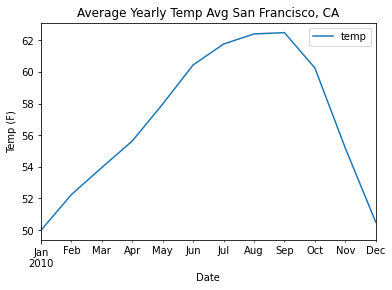

In [5]:
# 3rd Step: Visualize Data
df.plot()
plt.title("Average Yearly Temp Avg San Francisco, CA")
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.show()

### 2. Write the code necessary to visualize the minimum temperature over time.

In [6]:
# Import Dataframe (Non Aggrigated)
from vega_datasets import data
df = data.sf_temps()
# 1st Step Sort Index
df = df.set_index('date').sort_index()
# Sorting by min_value ** Remove Reset Index in order to resample **
d = {'min':'min_value'}
df = df.groupby('date')['temp'].agg([min]).rename(columns=d)
# Resample by month
min_temp_df = df.resample('M').min()
min_temp_df.head()

,min_value
date,
2010-01-31,45.8
2010-02-28,46.9
2010-03-31,48.7
2010-04-30,49.3
2010-05-31,51.4


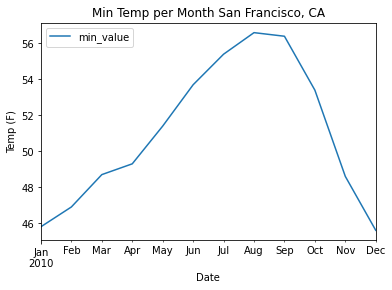

In [7]:
# Visualize Min Temps
min_temp_df.plot()
#df.plot(kind='line',x='date',y='max_value', color='red', ax=ax)
plt.title("Min Temp per Month San Francisco, CA")
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.show()

### 3. Write the code necessary to visualize the maximum temperature over time.

In [8]:
# Import Dataframe (Non Aggrigated)
from vega_datasets import data
df = data.sf_temps()
# Sort Index
df = df.set_index('date').sort_index()
# Sorting by max_value ** Remove Reset Index in order to resample **
d = {'max':'max_value'}
df = df.groupby('date')['temp'].agg([max]).rename(columns=d)
# Resample by month
max_temp_df = df.resample('M').max()
max_temp_df.head()

,max_value
date,
2010-01-31,56.2
2010-02-28,58.6
2010-03-31,61.3
2010-04-30,64.3
2010-05-31,66.4


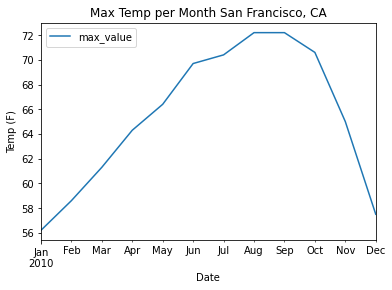

In [9]:
# Visualize Min Temps
max_temp_df.plot()
#df.plot(kind='line',x='date',y='max_value', color='red', ax=ax)
plt.title("Max Temp per Month San Francisco, CA")
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.show()

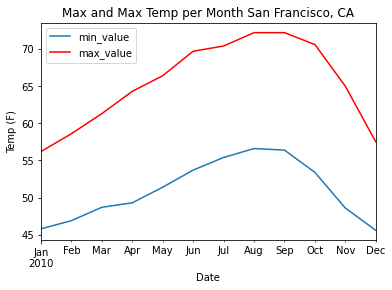

In [10]:
# Both Plots Together

ax = plt.gca()

min_temp_df.plot(ax=ax)
max_temp_df.plot(color='red', ax=ax)
plt.title("Max and Max Temp per Month San Francisco, CA")
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.show()

### 4. Which month is the coldest, on average?

In [11]:
# Import Dataframe (Non Aggrigated)
from vega_datasets import data
df = data.sf_temps()
# Sort Index
df = df.set_index('date').sort_index()
# Resample
monthly_temps = df.resample('M')
#  Groupby date to fin min temp
coldest_month = monthly_temps.mean().idxmin()[0]
coldest_month = coldest_month.strftime('%B')
print(f'{coldest_month} was the coldest month on average in 2010.')

January was the coldest month on average in 2010.


### 5. Which month has the highest average temperature?

In [12]:
# Import Dataframe (Non Aggrigated)
from vega_datasets import data
df = data.sf_temps()
# Sort Index
df = df.set_index('date').sort_index()
# Resample
monthly_temps = df.resample('M')
#  Groupby date to fin min temp
warmest_month = monthly_temps.mean().idxmax()[0]
warmest_month = warmest_month.strftime('%B')
print(f'{warmest_month} was the warmest month on average in 2010.')

September was the warmest month on average in 2010.


### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [13]:
# Import Dataframe (Non Aggrigated)
from vega_datasets import data
df = data.sf_temps()
# Sort Index
df = df.set_index('date').sort_index()
# Resample for min/mad of Day
df = df.resample('D')['temp'].agg(['min', 'max'])
# Create variability Column
df['variability'] = (df['max'] - df['min'])
df.head()

,min,max,variability
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [15]:
# Resample
df = df.resample('M')['variability'].agg(['max'])
df

,max
date,
2010-01-31,9.3
2010-02-28,9.9
2010-03-31,12.0
2010-04-30,13.0
2010-05-31,13.1
2010-06-30,14.8
2010-07-31,14.8
2010-08-31,15.0
2010-09-30,14.9


In [16]:
# Print Answer
max_vari = df.idxmax()[0]
max_vari = max_vari.strftime('%B')
print(f'{max_vari} was found to demonstate the greatest monthly variability in 2010.')

August was found to demonstate the greatest monthly variability in 2010.


### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

***

# Part Two: Seattle

***

### 1. Which year and month combination has the highest amount of precipitation?

### 2. Visualize the amount of monthly precipitation over time.

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

### 4. Which year-month combination is the windiest?

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

### 6. In which month does it rain the most?

### 7. Which month has the most number of days with a non-zero amount of precipitation?

***

# Part Three: flights_20k

***

### 1. Convert any negative delays to 0.

### 2. Which hour of the day has the highest average delay?

### 3. Does the day of the week make a difference in the delay amount?

### 4. Does the month make a difference in the delay amount?

***

# Part Four: iowa_electricity (Bonus)

***

### 1. For each row, calculate the percentage of the year's total that energy source provided.

### 2. Lineplot of generation over time, color by source

### 3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

### 4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

### 5. Is the total generation increasing over time?
    - How would you control for increasing consumption over time when considering how much energy is coming from
      each source?
    - express each number as a % of the year's total